In [7]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sb
sb.set_style('darkgrid')

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
h=pd.read_csv('C:/Users/siddharth21.TRN/Downloads/Classification_Datasets_-_Reg/horse.csv')
h

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,528355,NaN,NaN,NaN,warm,normal,pale_pink,less_3_sec,...,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
6,yes,adult,526802,37.9,48.0,16.0,normal,normal,normal_pink,less_3_sec,...,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
7,yes,adult,529607,NaN,60.0,NaN,cool,NaN,NaN,less_3_sec,...,44.0,8.3,NaN,NaN,died,yes,2208,0,0,no
8,no,adult,530051,NaN,80.0,36.0,cool,absent,pale_pink,less_3_sec,...,38.0,6.2,NaN,NaN,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.3,90.0,NaN,normal,NaN,normal_pink,less_3_sec,...,40.0,6.2,clear,2.2,lived,no,0,0,0,yes


In [9]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

In [10]:
h.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hospital_number,299.0,1.087733e+06,1.532032e+06,518476.0,528904.0,530301.0,534736.00,5305629.0
rectal_temp,239.0,3.816862e+01,7.337444e-01,35.4,37.8,38.2,38.50,40.8
pulse,275.0,7.200000e+01,2.864622e+01,30.0,48.0,64.0,88.00,184.0
respiratory_rate,241.0,3.046058e+01,1.766610e+01,8.0,18.0,25.0,36.00,96.0
nasogastric_reflux_ph,53.0,4.707547e+00,1.982311e+00,1.0,3.0,5.0,6.50,7.5
packed_cell_volume,270.0,4.630741e+01,1.043674e+01,23.0,38.0,45.0,52.00,75.0
total_protein,266.0,2.427444e+01,2.736419e+01,3.3,6.5,7.5,56.75,89.0
abdomo_protein,101.0,3.039604e+00,1.967947e+00,0.1,2.0,2.3,3.90,10.1
lesion_1,299.0,3.659709e+03,5.408472e+03,0.0,2111.5,2322.0,3209.00,41110.0
lesion_2,299.0,9.052843e+01,6.506371e+02,0.0,0.0,0.0,0.00,7111.0


In [5]:
h.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [11]:
h.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [19]:
h['rectal_temp'].mean()

38.168619246861994

In [13]:
h['rectal_temp'].fillna((h['rectal_temp'].mean()),inplace=True)

In [15]:
h['rectal_temp'].isnull().sum()

0

In [16]:
h['pulse'].mean()

72.0

In [20]:
h['pulse'].median()

64.0

In [21]:
h['pulse'].fillna((h['pulse'].mean()),inplace=True)

In [22]:
h['pulse'].isnull().sum()

0

In [23]:
h['respiratory_rate'].mean()

30.46058091286307

In [24]:
h['respiratory_rate'].fillna((h['respiratory_rate'].mean()),inplace=True)

In [25]:
h['respiratory_rate'].isnull().sum()

0

In [26]:
h['temp_of_extremities'].mode()

0    cool
dtype: object

In [29]:
h['temp_of_extremities'].fillna((h['temp_of_extremities'].mode()[0]),inplace=True)

In [30]:
h['temp_of_extremities'].isnull().sum()

0

In [31]:
h['peripheral_pulse'].mode()

0    normal
dtype: object

In [33]:
h['peripheral_pulse'].fillna((h['peripheral_pulse'].mode()[0]),inplace=True)

In [34]:
h['peripheral_pulse'].isnull().sum()

0

In [35]:
h['mucous_membrane'].mode()

0    normal_pink
dtype: object

In [36]:
h['mucous_membrane'].fillna((h['mucous_membrane'].mode()[0]),inplace=True)

In [37]:
h['mucous_membrane'].isnull().sum()

0

In [38]:
h['capillary_refill_time'].mode()

0    less_3_sec
dtype: object

In [39]:
h['capillary_refill_time'].fillna((h['capillary_refill_time'].mode()[0]),inplace=True)

In [41]:
h['capillary_refill_time'].isnull().sum()

0

In [42]:
h['pain']

0      extreme_pain
1         mild_pain
2         mild_pain
3         depressed
4               NaN
5         depressed
6         mild_pain
7               NaN
8       severe_pain
9      extreme_pain
10        mild_pain
11        depressed
12        mild_pain
13            alert
14        mild_pain
15     extreme_pain
16      severe_pain
17              NaN
18        depressed
19              NaN
20     extreme_pain
21            alert
22        depressed
23        depressed
24              NaN
25              NaN
26        mild_pain
27              NaN
28              NaN
29            alert
           ...     
269       mild_pain
270    extreme_pain
271    extreme_pain
272    extreme_pain
273             NaN
274    extreme_pain
275     severe_pain
276           alert
277           alert
278       depressed
279           alert
280       depressed
281       depressed
282             NaN
283       mild_pain
284       mild_pain
285     severe_pain
286             NaN
287             NaN


In [43]:
h['pain'].mode()

0    mild_pain
dtype: object

In [44]:
h['pain'].fillna((h['pain'].mode()[0]),inplace=True)

In [45]:
h['pain'].isnull().sum()

0

In [46]:
h['peristalsis'].value_counts()

hypomotile     127
absent          73
hypermotile     39
normal          16
Name: peristalsis, dtype: int64

In [47]:
h['peristalsis'].mode()

0    hypomotile
dtype: object

In [48]:
h['peristalsis'].fillna((h['peristalsis'].mode()[0]),inplace=True)

In [49]:
h['peristalsis'].isnull().sum()

0

In [54]:
h.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [55]:
h

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.500000,66.0,28.000000,cool,reduced,normal_pink,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.200000,88.0,20.000000,cool,normal,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.300000,40.0,24.000000,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.100000,164.0,84.000000,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.300000,104.0,35.000000,cool,normal,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
5,no,adult,528355,38.168619,72.0,30.460581,warm,normal,pale_pink,less_3_sec,...,NaN,NaN,NaN,NaN,lived,no,0,0,0,no
6,yes,adult,526802,37.900000,48.0,16.000000,normal,normal,normal_pink,less_3_sec,...,37.0,7.0,NaN,NaN,lived,yes,3124,0,0,no
7,yes,adult,529607,38.168619,60.0,30.460581,cool,normal,normal_pink,less_3_sec,...,44.0,8.3,NaN,NaN,died,yes,2208,0,0,no
8,no,adult,530051,38.168619,80.0,36.000000,cool,absent,pale_pink,less_3_sec,...,38.0,6.2,NaN,NaN,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.300000,90.0,30.460581,normal,normal,normal_pink,less_3_sec,...,40.0,6.2,clear,2.2,lived,no,0,0,0,yes


In [56]:
h['abdominal_distention'].value_counts()

none        75
moderate    65
slight      65
severe      38
Name: abdominal_distention, dtype: int64

In [58]:
h['abdominal_distention'].mode()

0    none
dtype: object

In [59]:
h['abdominal_distention'].fillna((h['abdominal_distention'].mode()[0]),inplace=True)

In [61]:
h['abdominal_distention'].isnull().sum()

0

In [62]:
h['nasogastric_tube'].value_counts()

slight         101
none            71
significant     23
Name: nasogastric_tube, dtype: int64

In [63]:
h['nasogastric_tube'].mode()

0    slight
dtype: object

In [64]:
h['nasogastric_tube'].fillna((h['nasogastric_tube'].mode()[0]),inplace=True)

In [66]:
h['nasogastric_tube'].isnull().sum()

0

In [67]:
h['nasogastric_reflux'].value_counts()

none            119
more_1_liter     39
less_1_liter     35
Name: nasogastric_reflux, dtype: int64

In [68]:
h['nasogastric_reflux'].mode()

0    none
dtype: object

In [69]:
h['nasogastric_reflux'].fillna((h['nasogastric_reflux'].mode()[0]),inplace=True)

In [70]:
h['nasogastric_reflux'].isnull().sum()

0

In [71]:
h['nasogastric_reflux_ph'].value_counts()

2.0    9
7.0    8
6.5    5
5.0    4
5.5    4
3.0    3
4.5    3
4.0    3
1.0    2
7.5    2
6.0    1
5.7    1
5.3    1
3.5    1
4.3    1
7.2    1
6.2    1
4.4    1
5.4    1
1.5    1
Name: nasogastric_reflux_ph, dtype: int64

In [72]:
h['nasogastric_reflux_ph'].mode()

0    2.0
dtype: float64

In [73]:
h['nasogastric_reflux_ph'].fillna((h['nasogastric_reflux_ph'].mode()[0]),inplace=True)

In [74]:
h['nasogastric_reflux_ph'].isnull().sum()

0

In [75]:
h['rectal_exam_feces'].value_counts()

absent       79
normal       57
decreased    48
increased    13
Name: rectal_exam_feces, dtype: int64

In [76]:
h['rectal_exam_feces'].fillna((h['rectal_exam_feces'].mode()[0]),inplace=True)

In [78]:
h['rectal_exam_feces'].isnull().sum()

0

In [79]:
h['abdomen'].value_counts()

distend_large    78
distend_small    43
normal           28
other            19
firm             13
Name: abdomen, dtype: int64

In [80]:
h['abdomen'].fillna((h['abdomen'].mode()[0]),inplace=True)

In [81]:
h['abdomen'].isnull().sum()

0

In [82]:
h.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention       0
nasogastric_tube           0
nasogastric_reflux         0
nasogastric_reflux_ph      0
rectal_exam_feces          0
abdomen                    0
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [83]:
h['packed_cell_volume'].value_counts()

50.0    16
37.0    16
45.0    14
43.0    13
44.0    13
40.0    12
36.0    11
47.0    10
35.0    10
46.0     9
39.0     9
38.0     9
48.0     9
33.0     8
42.0     8
60.0     8
41.0     8
49.0     7
54.0     6
55.0     6
52.0     6
57.0     6
34.0     5
53.0     4
65.0     4
68.0     4
64.0     4
66.0     3
63.0     2
32.0     2
56.0     2
73.0     2
58.0     2
69.0     2
51.0     2
59.0     2
31.0     2
75.0     2
72.0     1
70.0     1
31.5     1
71.0     1
74.0     1
37.5     1
23.0     1
30.0     1
67.0     1
24.0     1
26.0     1
28.0     1
Name: packed_cell_volume, dtype: int64

In [87]:
h['packed_cell_volume'].mean()

46.30740740740741

In [91]:
h['packed_cell_volume'].fillna((h['packed_cell_volume'].mode()[0]),inplace=True)

In [92]:
h['packed_cell_volume'].isnull().sum()

0

In [93]:
h['total_protein'].value_counts()

6.5     15
7.0     15
7.5     13
6.6     11
7.2      9
65.0     8
6.7      8
5.9      8
6.0      7
6.2      6
6.8      6
8.0      5
7.7      5
64.0     5
7.6      5
6.3      5
70.0     5
6.1      5
8.5      5
67.0     4
8.1      4
8.6      4
66.0     4
7.4      4
7.8      4
58.0     4
6.4      4
5.5      4
62.0     3
75.0     3
        ..
54.0     2
5.3      2
72.0     1
76.0     1
82.0     1
8.8      1
4.0      1
86.0     1
5.0      1
7.9      1
9.1      1
3.3      1
7.1      1
4.6      1
10.2     1
8.2      1
4.7      1
5.8      1
9.0      1
63.0     1
13.0     1
50.0     1
11.0     1
8.9      1
51.0     1
89.0     1
59.0     1
53.0     1
46.0     1
85.0     1
Name: total_protein, Length: 80, dtype: int64

In [94]:
h['total_protein'].mean()

24.27443609022557

In [95]:
h['total_protein'].mode()

0    6.5
1    7.0
dtype: float64

In [96]:
h['total_protein'].fillna((h['total_protein'].mean()),inplace=True)

In [97]:
h['total_protein'].isnull().sum()

0

In [99]:
h['abdomo_appearance'].value_counts()

cloudy           47
serosanguious    46
clear            41
Name: abdomo_appearance, dtype: int64

In [101]:
h['abdomo_appearance'].fillna((h['abdomo_appearance'].mode()[0]),inplace=True)

In [102]:
h['abdomo_appearance'].isnull().sum()

0

In [103]:
h['abdomo_protein'].value_counts()

2.0     26
1.0     16
2.6      4
3.9      4
5.0      3
3.6      3
2.8      3
7.0      3
3.4      3
3.0      2
4.1      2
2.3      2
1.6      2
6.0      2
4.3      2
4.5      2
5.3      2
2.5      1
10.0     1
8.0      1
1.5      1
2.9      1
4.4      1
1.3      1
4.8      1
5.2      1
2.1      1
2.2      1
1.4      1
3.3      1
7.4      1
0.1      1
4.7      1
3.7      1
10.1     1
3.2      1
6.6      1
Name: abdomo_protein, dtype: int64

In [104]:
h['abdomo_protein'].mode()

0    2.0
dtype: float64

In [105]:
h['abdomo_protein'].fillna((h['abdomo_protein'].mode()[0]),inplace=True)

In [106]:
h.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

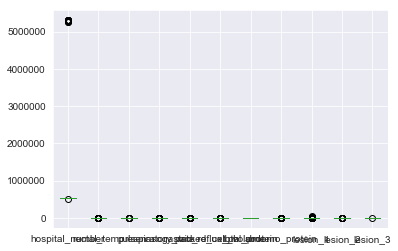

In [107]:
h.plot(kind='box')

In [108]:
h


,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.500000,66.0,28.000000,cool,reduced,normal_pink,more_3_sec,...,45.0,8.400000,cloudy,2.0,died,no,11300,0,0,no
1,yes,adult,534817,39.200000,88.0,20.000000,cool,normal,pale_cyanotic,less_3_sec,...,50.0,85.000000,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.300000,40.0,24.000000,normal,normal,pale_pink,less_3_sec,...,33.0,6.700000,cloudy,2.0,lived,no,0,0,0,yes
3,yes,young,5290409,39.100000,164.0,84.000000,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.200000,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.300000,104.0,35.000000,cool,normal,dark_cyanotic,more_3_sec,...,74.0,7.400000,cloudy,2.0,died,no,4300,0,0,no
5,no,adult,528355,38.168619,72.0,30.460581,warm,normal,pale_pink,less_3_sec,...,37.0,24.274436,cloudy,2.0,lived,no,0,0,0,no
6,yes,adult,526802,37.900000,48.0,16.000000,normal,normal,normal_pink,less_3_sec,...,37.0,7.000000,cloudy,2.0,lived,yes,3124,0,0,no
7,yes,adult,529607,38.168619,60.0,30.460581,cool,normal,normal_pink,less_3_sec,...,44.0,8.300000,cloudy,2.0,died,yes,2208,0,0,no
8,no,adult,530051,38.168619,80.0,36.000000,cool,absent,pale_pink,less_3_sec,...,38.0,6.200000,cloudy,2.0,euthanized,yes,3205,0,0,no
9,no,young,5299629,38.300000,90.0,30.460581,normal,normal,normal_pink,less_3_sec,...,40.0,6.200000,clear,2.2,lived,no,0,0,0,yes


In [110]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              299 non-null float64
pulse                    299 non-null float64
respiratory_rate         299 non-null float64
temp_of_extremities      299 non-null object
peripheral_pulse         299 non-null object
mucous_membrane          299 non-null object
capillary_refill_time    299 non-null object
pain                     299 non-null object
peristalsis              299 non-null object
abdominal_distention     299 non-null object
nasogastric_tube         299 non-null object
nasogastric_reflux       299 non-null object
nasogastric_reflux_ph    299 non-null float64
rectal_exam_feces        299 non-null object
abdomen                  299 non-null object
packed_cell_volume       299 non-null float64
total_protein            299 non-nul

In [111]:
le_surgery=LabelEncoder()
le_surgery=le_surgery.fit(h['surgery'])
h['surgery']=le_surgery.transform(h['surgery'])

1=yes, 0=no

In [113]:
h['age'].value_counts()

adult    275
young     24
Name: age, dtype: int64

In [114]:
le_age=LabelEncoder()
le_age=le_age.fit(h['age'])
h['age']=le_age.transform(h['age'])

adult=0,young=1

In [116]:
h['temp_of_extremities'].value_counts()

cool      164
normal     78
warm       30
cold       27
Name: temp_of_extremities, dtype: int64

In [117]:
le_temp=LabelEncoder()
le_temp=le_temp.fit(h['temp_of_extremities'])
h['temp_of_extremities']=le_temp.transform(h['temp_of_extremities'])

cool=0,normal=1,warm=2,cold=3

In [118]:
h['peripheral_pulse'].value_counts()

normal       183
reduced      103
absent         8
increased      5
Name: peripheral_pulse, dtype: int64

In [119]:
le_peri=LabelEncoder()
le_peri=le_peri.fit(h['peripheral_pulse'])
h['peripheral_pulse']=le_peri.transform(h['peripheral_pulse'])

normal=0,reduced=1,absent=2,increased=3

In [120]:
h['mucous_membrane'].value_counts()

normal_pink      126
pale_pink         57
pale_cyanotic     41
bright_pink       30
bright_red        25
dark_cyanotic     20
Name: mucous_membrane, dtype: int64

In [121]:
le_muc=LabelEncoder()
le_muc=le_muc.fit(h['mucous_membrane'])
h['mucous_membrane']=le_muc.transform(h['mucous_membrane'])

In [122]:
h['capillary_refill_time'].value_counts()

less_3_sec    219
more_3_sec     78
3               2
Name: capillary_refill_time, dtype: int64

In [124]:
le_cap=LabelEncoder()
le_cap=le_cap.fit(h['capillary_refill_time'])
h['capillary_refill_time']=le_cap.transform(h['capillary_refill_time'])

less=0,more=1,3=2

In [123]:
h['pain'].value_counts()

mild_pain       122
depressed        59
extreme_pain     42
severe_pain      38
alert            38
Name: pain, dtype: int64

In [125]:
le_pain=LabelEncoder()
le_pain=le_pain.fit(h['pain'])
h['pain']=le_pain.transform(h['pain'])

mi=0,dep=1,ex=2,sev=3,al=4

In [127]:
h['peristalsis'].value_counts()

hypomotile     171
absent          73
hypermotile     39
normal          16
Name: peristalsis, dtype: int64

In [132]:
le_peri=LabelEncoder()
le_peri=le_peri.fit(h['peristalsis'])
h['peristalsis']=le_peri.transform(h['peristalsis'])

hyp=0,abs=1,hyper=2,norm=3

In [128]:
h['abdominal_distention'].value_counts()

none        131
moderate     65
slight       65
severe       38
Name: abdominal_distention, dtype: int64

In [133]:
le_abd=LabelEncoder()
le_abd=le_abd.fit(h['abdominal_distention'])
h['abdominal_distention']=le_abd.transform(h['abdominal_distention'])

In [129]:
h['nasogastric_tube'].value_counts()

slight         205
none            71
significant     23
Name: nasogastric_tube, dtype: int64

slight=0,none=1,sig=2

In [134]:
le_naso=LabelEncoder()
le_naso=le_naso.fit(h['nasogastric_tube'])
h['nasogastric_tube']=le_naso.transform(h['nasogastric_tube'])

In [130]:
h['nasogastric_reflux'].value_counts()

none            225
more_1_liter     39
less_1_liter     35
Name: nasogastric_reflux, dtype: int64

In [135]:
le_nasog=LabelEncoder()
le_nasog=le_nasog.fit(h['nasogastric_reflux'])
h['nasogastric_reflux']=le_nasog.transform(h['nasogastric_reflux'])

In [136]:
h['rectal_exam_feces'].value_counts()

absent       181
normal        57
decreased     48
increased     13
Name: rectal_exam_feces, dtype: int64

In [137]:
le_rect=LabelEncoder()
le_rect=le_rect.fit(h['rectal_exam_feces'])
h['rectal_exam_feces']=le_rect.transform(h['rectal_exam_feces'])

In [138]:
h['abdomen'].value_counts()

distend_large    196
distend_small     43
normal            28
other             19
firm              13
Name: abdomen, dtype: int64

In [139]:
le_abdomen=LabelEncoder()
le_abdomen=le_abdomen.fit(h['abdomen'])
h['abdomen']=le_abdomen.transform(h['abdomen'])

In [140]:
h['abdomo_appearance'].value_counts()

cloudy           212
serosanguious     46
clear             41
Name: abdomo_appearance, dtype: int64

In [141]:
le_abdomo=LabelEncoder()
le_abdomo=le_abdomo.fit(h['abdomo_appearance'])
h['abdomo_appearance']=le_abdomo.transform(h['abdomo_appearance'])

In [142]:
h['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [145]:
le_out=LabelEncoder()
le_out=le_out.fit(h['outcome'])
h['outcome']=le_out.transform(h['outcome'])

In [143]:
h['surgical_lesion'].value_counts()

yes    190
no     109
Name: surgical_lesion, dtype: int64

In [146]:
le_surg=LabelEncoder()
le_surg=le_surg.fit(h['surgical_lesion'])
h['surgical_lesion']=le_surg.transform(h['surgical_lesion'])

In [144]:
h['cp_data'].value_counts()

no     200
yes     99
Name: cp_data, dtype: int64

In [147]:
le_cp=LabelEncoder()
le_cp=le_cp.fit(h['cp_data'])
h['cp_data']=le_cp.transform(h['cp_data'])

In [148]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null int32
age                      299 non-null int32
hospital_number          299 non-null int64
rectal_temp              299 non-null float64
pulse                    299 non-null float64
respiratory_rate         299 non-null float64
temp_of_extremities      299 non-null int32
peripheral_pulse         299 non-null int32
mucous_membrane          299 non-null int32
capillary_refill_time    299 non-null int32
pain                     299 non-null int32
peristalsis              299 non-null int32
abdominal_distention     299 non-null int32
nasogastric_tube         299 non-null int32
nasogastric_reflux       299 non-null int32
nasogastric_reflux_ph    299 non-null float64
rectal_exam_feces        299 non-null int32
abdomen                  299 non-null int32
packed_cell_volume       299 non-null float64
total_protein            299 non-null float64
abd

In [150]:
h.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
surgery,299.0,6.020067e-01,4.903046e-01,0.0,0.0,1.000000,1.0,1.0
age,299.0,8.026756e-02,2.721625e-01,0.0,0.0,0.000000,0.0,1.0
hospital_number,299.0,1.087733e+06,1.532032e+06,518476.0,528904.0,530301.000000,534736.0,5305629.0
rectal_temp,299.0,3.816862e+01,6.557301e-01,35.4,37.9,38.168619,38.5,40.8
pulse,299.0,7.200000e+01,2.746847e+01,30.0,48.5,68.000000,88.0,184.0
respiratory_rate,299.0,3.046058e+01,1.585398e+01,8.0,20.0,30.000000,34.5,96.0
temp_of_extremities,299.0,1.371237e+00,7.853368e-01,0.0,1.0,1.000000,2.0,3.0
peripheral_pulse,299.0,2.274247e+00,6.279607e-01,0.0,2.0,2.000000,3.0,3.0
mucous_membrane,299.0,2.983278e+00,1.486986e+00,0.0,2.5,3.000000,4.0,5.0
capillary_refill_time,299.0,1.254181e+00,4.512558e-01,0.0,1.0,1.000000,2.0,2.0


In [151]:
scaler=MinMaxScaler()
nh=pd.DataFrame(scaler.fit_transform(h))

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [152]:
nh

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.002428,0.574074,0.233766,0.227273,0.333333,1.000000,0.6,1.0,...,0.423077,0.059510,0.5,0.19,0.0,0.0,0.274872,0.0,0.0,0.0
1,1.0,0.0,0.003414,0.703704,0.376623,0.136364,0.333333,0.666667,0.8,0.5,...,0.519231,0.953326,0.5,0.19,0.5,0.0,0.053710,0.0,0.0,0.0
2,0.0,0.0,0.002477,0.537037,0.064935,0.181818,0.666667,0.666667,1.0,0.5,...,0.192308,0.039673,0.5,0.19,1.0,0.0,0.000000,0.0,0.0,1.0
3,1.0,1.0,0.996821,0.685185,0.870130,0.863636,0.000000,0.666667,0.4,1.0,...,0.480769,0.045508,1.0,0.52,0.0,1.0,0.053710,0.0,0.0,1.0
4,0.0,0.0,0.002461,0.351852,0.480519,0.306818,0.333333,0.666667,0.4,1.0,...,0.980769,0.047841,0.5,0.19,0.0,0.0,0.104597,0.0,0.0,0.0
5,0.0,0.0,0.002064,0.512707,0.272727,0.255234,1.000000,0.666667,1.0,0.5,...,0.269231,0.244743,0.5,0.19,1.0,0.0,0.000000,0.0,0.0,0.0
6,1.0,0.0,0.001739,0.462963,0.116883,0.090909,0.666667,0.666667,0.6,0.5,...,0.269231,0.043174,0.5,0.19,1.0,1.0,0.075991,0.0,0.0,0.0
7,1.0,0.0,0.002325,0.512707,0.194805,0.255234,0.333333,0.666667,0.6,0.5,...,0.403846,0.058343,0.5,0.19,0.0,1.0,0.053710,0.0,0.0,0.0
8,0.0,0.0,0.002418,0.512707,0.324675,0.318182,0.333333,0.000000,1.0,0.5,...,0.288462,0.033839,0.5,0.19,0.5,1.0,0.077962,0.0,0.0,0.0
9,0.0,1.0,0.998747,0.537037,0.389610,0.255234,0.666667,0.666667,0.6,0.5,...,0.326923,0.033839,0.0,0.21,1.0,0.0,0.000000,0.0,0.0,1.0


In [153]:
nh.columns=h.columns

In [154]:
nh

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0.0,0.0,0.002428,0.574074,0.233766,0.227273,0.333333,1.000000,0.6,1.0,...,0.423077,0.059510,0.5,0.19,0.0,0.0,0.274872,0.0,0.0,0.0
1,1.0,0.0,0.003414,0.703704,0.376623,0.136364,0.333333,0.666667,0.8,0.5,...,0.519231,0.953326,0.5,0.19,0.5,0.0,0.053710,0.0,0.0,0.0
2,0.0,0.0,0.002477,0.537037,0.064935,0.181818,0.666667,0.666667,1.0,0.5,...,0.192308,0.039673,0.5,0.19,1.0,0.0,0.000000,0.0,0.0,1.0
3,1.0,1.0,0.996821,0.685185,0.870130,0.863636,0.000000,0.666667,0.4,1.0,...,0.480769,0.045508,1.0,0.52,0.0,1.0,0.053710,0.0,0.0,1.0
4,0.0,0.0,0.002461,0.351852,0.480519,0.306818,0.333333,0.666667,0.4,1.0,...,0.980769,0.047841,0.5,0.19,0.0,0.0,0.104597,0.0,0.0,0.0
5,0.0,0.0,0.002064,0.512707,0.272727,0.255234,1.000000,0.666667,1.0,0.5,...,0.269231,0.244743,0.5,0.19,1.0,0.0,0.000000,0.0,0.0,0.0
6,1.0,0.0,0.001739,0.462963,0.116883,0.090909,0.666667,0.666667,0.6,0.5,...,0.269231,0.043174,0.5,0.19,1.0,1.0,0.075991,0.0,0.0,0.0
7,1.0,0.0,0.002325,0.512707,0.194805,0.255234,0.333333,0.666667,0.6,0.5,...,0.403846,0.058343,0.5,0.19,0.0,1.0,0.053710,0.0,0.0,0.0
8,0.0,0.0,0.002418,0.512707,0.324675,0.318182,0.333333,0.000000,1.0,0.5,...,0.288462,0.033839,0.5,0.19,0.5,1.0,0.077962,0.0,0.0,0.0
9,0.0,1.0,0.998747,0.537037,0.389610,0.255234,0.666667,0.666667,0.6,0.5,...,0.326923,0.033839,0.0,0.21,1.0,0.0,0.000000,0.0,0.0,1.0


In [157]:
nh.corr()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
surgery,1.000000,0.089319,0.126044,-0.036601,0.179646,0.181173,-0.190183,0.115915,0.041470,0.079588,...,0.029030,0.042420,0.139274,0.029151,-0.189222,0.605023,0.163940,0.098594,0.047101,0.005827
age,0.089319,1.000000,0.697331,0.179149,0.507224,0.375469,-0.014282,0.027843,-0.170800,-0.030065,...,-0.124240,-0.112925,-0.054823,-0.034036,-0.101782,0.044734,0.022870,0.017781,0.196089,0.079867
hospital_number,0.126044,0.697331,1.000000,0.132773,0.347838,0.248315,0.000103,0.023254,-0.157237,0.025368,...,-0.098728,-0.212407,-0.107999,-0.053040,-0.106396,0.102425,0.145397,-0.050433,-0.020950,0.096711
rectal_temp,-0.036601,0.179149,0.132773,1.000000,0.201133,0.239180,-0.045200,0.012756,-0.152002,0.114478,...,0.058430,-0.053487,-0.061184,-0.004019,0.016683,-0.017117,0.053031,-0.060428,0.029324,0.060035
pulse,0.179646,0.507224,0.347838,0.201133,1.000000,0.439825,-0.287472,0.247265,-0.047240,0.375765,...,0.358855,-0.079947,0.244304,0.068203,-0.344670,0.259733,0.075095,-0.001897,0.101397,0.112992
respiratory_rate,0.181173,0.375469,0.248315,0.239180,0.439825,1.000000,-0.027365,0.132643,-0.080842,0.083410,...,0.058042,-0.077715,0.076307,-0.042788,-0.079408,0.218532,0.152318,-0.020553,0.144714,-0.059130
temp_of_extremities,-0.190183,-0.014282,0.000103,-0.045200,-0.287472,-0.027365,1.000000,-0.193530,-0.089494,-0.257690,...,-0.270435,0.030805,-0.236222,-0.079070,0.290367,-0.226318,0.025731,0.026258,-0.027429,-0.052143
peripheral_pulse,0.115915,0.027843,0.023254,0.012756,0.247265,0.132643,-0.193530,1.000000,0.080396,0.226861,...,0.259239,-0.038235,0.164539,0.101571,-0.165719,0.165077,0.128019,0.001640,-0.025341,0.066310
mucous_membrane,0.041470,-0.170800,-0.157237,-0.152002,-0.047240,-0.080842,-0.089494,0.080396,1.000000,-0.058657,...,-0.128259,-0.011503,0.067207,-0.004078,0.056852,0.075724,0.074783,0.028010,0.000653,-0.111756
capillary_refill_time,0.079588,-0.030065,0.025368,0.114478,0.375765,0.083410,-0.257690,0.226861,-0.058657,1.000000,...,0.451013,-0.069844,0.257890,0.082703,-0.256294,0.165131,0.052515,0.008490,-0.032684,0.076290


In [159]:
nh.var().sort_values()

lesion_3                 0.003344
lesion_2                 0.008372
rectal_temp              0.014746
abdomo_protein           0.015422
lesion_1                 0.017308
pulse                    0.031815
respiratory_rate         0.032457
packed_cell_volume       0.039178
nasogastric_reflux_ph    0.041619
peripheral_pulse         0.043815
capillary_refill_time    0.050908
temp_of_extremities      0.068528
abdomo_appearance        0.072916
age                      0.074072
mucous_membrane          0.088445
total_protein            0.090664
peristalsis              0.093765
pain                     0.098936
abdomen                  0.099751
hospital_number          0.102419
nasogastric_reflux       0.116832
abdominal_distention     0.122117
rectal_exam_feces        0.153709
nasogastric_tube         0.181163
outcome                  0.185304
cp_data                  0.222217
surgical_lesion          0.232430
surgery                  0.240399
dtype: float64

In [ ]:
x=nh.loc[:,[]]